In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
Data_set = pd.read_csv('/content/dataset.csv')
Data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11059 entries, 0 to 11058
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          11059 non-null  object
 1   title         11059 non-null  object
 2   cast          9694 non-null   object
 3   country       8364 non-null   object
 4   release_year  11059 non-null  int64 
 5   listed_in     11059 non-null  object
 6   description   11059 non-null  object
dtypes: int64(1), object(6)
memory usage: 604.9+ KB


In [ ]:
(Data_set.isnull().sum(axis=0)/Data_set.shape[0]) * 100

In [ ]:
Data_set = Data_set.dropna()

In [ ]:
def One_Hot_Encoding(Data_set: pd.DataFrame, sep: str, rep: str):
    Data_set = Data_set.copy()
    for column in Data_set.columns:
        if Data_set[column].dtype == 'O':
            X = Data_set[column].str.replace(rep, '').str.get_dummies(sep)
            Data_set = Data_set.drop(column, axis=1)
            Data_set = Data_set.join(X)
    return Data_set

Data_Set_1 = One_Hot_Encoding(Data_set[['type', 'country']], sep=',', rep=' ')
Data_Set_One_Hot_Encoding = Data_Set_1.join(Data_set_scaled[['title', 'cast', 'release_year', 'description', 'listed_in']])
Data_Set_One_Hot_Encoding = Data_Set_One_Hot_Encoding.drop('TVShow', axis=1)

In [ ]:
scaler = preprocessing.MinMaxScaler((0,1))
scaled = scaler.fit_transform(Data_set[['release_year']])

Data_set_scaled = Data_set.copy()
Data_set_scaled['release_year'] = scaled

In [ ]:
Data_Set_1 = One_Hot_Encoding(Data_Set_One_Hot_Encoding[['listed_in']], sep=',', rep='and')
Data_Set_One_Hot_Encoding = Data_Set_1.join(Data_Set_One_Hot_Encoding.drop('listed_in', axis=1))

In [ ]:
STR = Data_Set_One_Hot_Encoding['description'] + ' ' + Data_Set_One_Hot_Encoding['title'] + ' ' + Data_Set_One_Hot_Encoding['cast']
Vector = CountVectorizer(analyzer='word', min_df=0.02, max_df=0.6)
Transform = Vector.fit_transform(STR)

In [ ]:
Y = 'desc_' + pd.Series(Vector.get_feature_names())
Data_Set_Process = Data_Set_One_Hot_Encoding.join(pd.DataFrame(Transform.toarray(), Data_Set_One_Hot_Encoding.index, columns=Y))
Data_Set_Process = Data_Set_Process.drop(['description', 'title', 'cast'], axis=1)
Data_Set_Process

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Culture,Animals & Nature,Animation,Anime,Anime Features,Anthology,Buddy,Children & Family Movies,Classic & Cult TV,Classic Movies,...,desc_while,desc_who,desc_wife,desc_will,desc_with,desc_woman,desc_world,desc_year,desc_years,desc_young
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(Data_Set_Process.drop('Movie', axis=1), Data_Set_Process['Movie'], test_size=0.25, random_state=1)

In [ ]:
classifier = DecisionTreeClassifier()

classifier = classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)
predictions

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
print('Model accuracy on train data: %.2f%%' % (sklearn.metrics.accuracy_score(y_train, classifier.predict(X_train)) * 100))
print('Model accuracy on test data: %.2f%%' % (sklearn.metrics.accuracy_score(y_test, predictions) * 100))

Model accuracy on train data: 100.00%
Model accuracy on test data: 99.74%


In [ ]:
CONFUSION_MATRIX = sklearn.metrics.confusion_matrix(y_test, predictions)
pd.DataFrame(CONFUSION_MATRIX, ['Actual True', 'Actual False'], columns=['Predicted True', 'Predicted False'])

,Predicted True,Predicted False
Actual True,622,5
Actual False,0,1289


In [ ]:
Hyper_Parameters = {
    'max_depth': range(10, 50),
    'min_samples_split': range(2, 5)
}
Best_Parameters = sklearn.model_selection.GridSearchCV(classifier, Hyper_Parameters, n_jobs=-1, verbose=1)
Best_Parameters.fit(X_train, y_train)
Best_Parameters.best_params_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


{'max_depth': 41, 'min_samples_split': 3}

In [ ]:
classifier = DecisionTreeClassifier(max_depth=44, min_samples_split=4)

classifier = classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)

print('Model accuracy on train data: %.2f%%' % (sklearn.metrics.accuracy_score(y_train, classifier.predict(X_train)) * 100))
print('Model accuracy on test data: %.2f%%' % (sklearn.metrics.accuracy_score(y_test, predictions) * 100))

Model accuracy on train data: 100.00%
Model accuracy on test data: 99.69%


In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(Data_Set_Process.drop('Movie', axis=1), Data_Set_Process['Movie'], test_size=0.02, random_state=1)

In [ ]:
classifier = DecisionTreeClassifier(max_depth=44, min_samples_split=4)

In [ ]:
classifier = classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)

In [ ]:
print('Model accuracy on train data: %.2f%%' % (sklearn.metrics.accuracy_score(y_train, classifier.predict(X_train)) * 100))
print('Model accuracy on test data: %.2f%%' % (sklearn.metrics.accuracy_score(y_test, predictions) * 100))

Model accuracy on train data: 100.00%
Model accuracy on test data: 100.00%


In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(Data_Set_Process.drop('Movie', axis=1), Data_Set_Process['Movie'], test_size=0.25, random_state=1)

In [ ]:
X_train

,Culture,Animals & Nature,Animation,Anime,Anime Features,Anthology,Buddy,Children & Family Movies,Classic & Cult TV,Classic Movies,...,desc_while,desc_who,desc_wife,desc_will,desc_with,desc_woman,desc_world,desc_year,desc_years,desc_young
3736,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


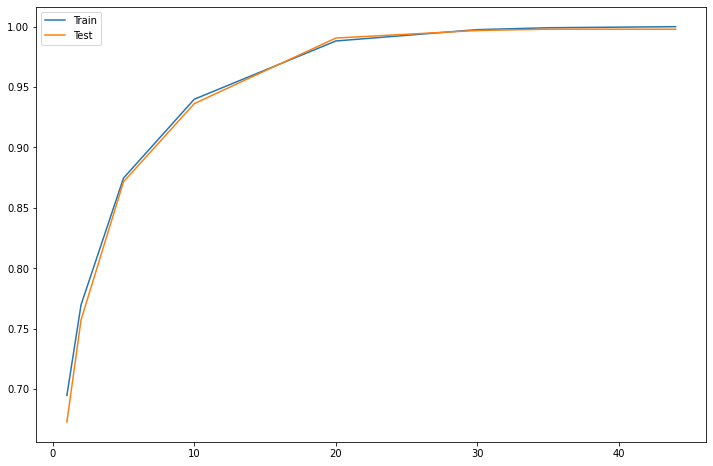

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(Data_Set_Process.drop('Movie', axis=1), Data_Set_Process['Movie'], test_size=0.25, random_state=1)

train_accuracy = []
test_accuracy = []

Maximum_Depth = [1, 2, 5, 10, 20, 30, 35, 44]
for max_depth in Maximum_Depth:
    classifier = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=4)
    classifier = classifier.fit(X_train,y_train)
    predictions = classifier.predict(X_test)
    
    train_accuracy.append(sklearn.metrics.accuracy_score(y_train, classifier.predict(X_train)))
    test_accuracy.append(sklearn.metrics.accuracy_score(y_test, classifier.predict(X_test)))

plt.figure(figsize=(12,8))
plt.plot(Maximum_Depth, train_accuracy)
plt.plot(Maximum_Depth, test_accuracy)
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(Data_Set_Process.drop('Movie', axis=1), Data_Set_Process['Movie'], test_size=0.25, random_state=1)

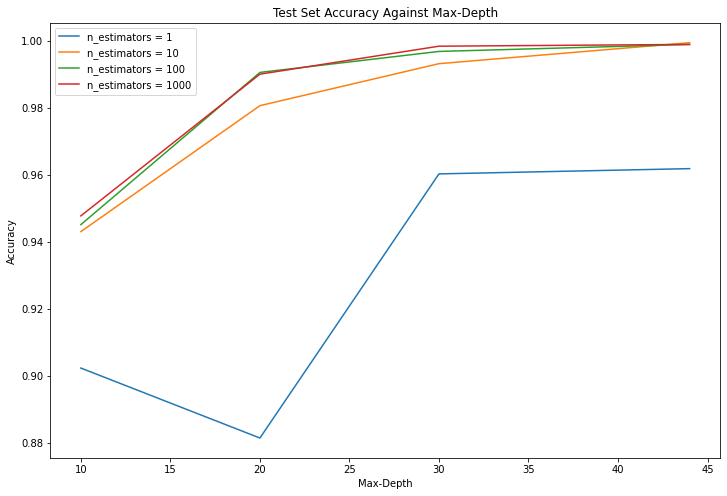

In [ ]:
Estimators = [1, 10, 100, 1000]
Maximum_Depth = [10, 20, 30, 44]

plt.figure(figsize=(12,8))

for n_estimators in Estimators:
    test_accuracy = []
    for max_depth in Maximum_Depth:
        classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
        classifier.fit(X_train, y_train)

        test_accuracy.append(sklearn.metrics.accuracy_score(y_test, classifier.predict(X_test)))

    plt.plot(Maximum_Depth,test_accuracy)

plt.title('Test Set Accuracy Against Max-Depth')
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.legend(['n_estimators = {}'.format(i) for i in Estimators])
plt.show()

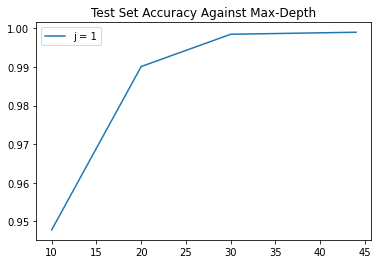

In [ ]:
plt.plot(Maximum_Depth, test_accuracy)

plt.title('Test Set Accuracy Against Max-Depth')
plt.legend(['j = {}'.format(i) for i in Estimator])

In [ ]:
classifier = RandomForestClassifier(n_estimators=1000, max_depth=44)
classifier.fit(X_train, y_train)

print('Random forest accuracy on the test set: %.4f%%' % (sklearn.metrics.accuracy_score(y_test, classifier.predict(X_test)) * 100))

Random forest accuracy on the test set: 99.8956%
